Analysis of RNA-seq simulations using various methods. Most computations to parse/summarize data are performed by functions residing in `simulations.py`

In [1]:
import os

import msyexp.datasets as ds
import msyexp.simulations as ys
import msyexp.xytools as xytools

%matplotlib inline

In [2]:
outdir = '{}/simulation'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [3]:
data = ds.get_simulation_results()

In [4]:
data.loc[xytools.MSYFAMS].head()

sim_y0                                                              \
      cufflinks                                                               
       simlib_1 simlib_10 simlib_11 simlib_12 simlib_13 simlib_14 simlib_15   
AMELY       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
BPY2        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
CDY         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
DAZ         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
DDX3Y       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

                                     ... sim_y5_xuncorr                      \
                                     ...         salmon                       
      simlib_16 simlib_17 simlib_18  ...      simlib_46 simlib_47 simlib_48   
AMELY       0.0       0.0       0.0  ...       5.649057  3.780381  4.737573   
BPY2        0.0       0.0       0.0  ...       4.520349  4.010787  4.031357   
CDY         0.0       0.0       0.0  ...       5.309448  4.855554  4.993903   
DAZ         0.0       0.0       0.0  ...       5.438327  4.986943  5.062408   
DDX3Y       0.0       0.0       0.0  ...       4.247795  4.978731  4.870905   

                                                                             
                                                                             
      simlib_49  simlib_5 simlib_50  simlib_6  simlib_7  simlib_8  simlib_9  
AMELY  5.552006  5.349575  5.341057  5.462463  4.215848  5.209988  4.877507  
BPY2   3.548854  4.146630  4.882712  4.016768  5.290692  5.473827  3.629418  
CDY    4.980359  4.705110  4.704783  4.920459  5.234743  4.640301  4.612755  
DAZ    4.740555  5.039004  5.555131  5.043848  4.703570  4.678755  5.571879  
DDX3Y  4.635837  4.893527  4.887937  5.173933  4.399450  4.774257  4.911117  

[5 rows x 1200 columns]

### Accuracy of MSY gene expression level estimates

#### Plot strip plots

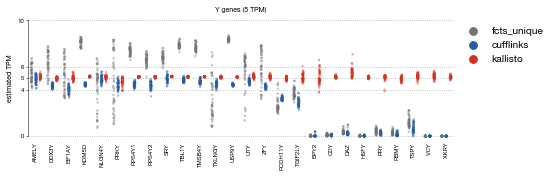

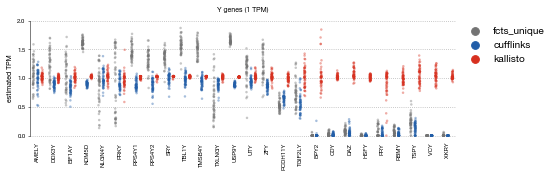

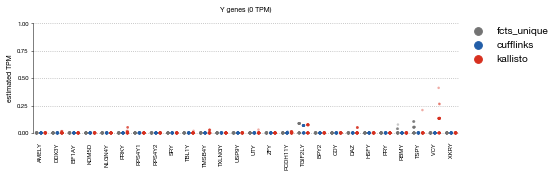

In [5]:
figs = {}
axes = {}
for s in ['sim_y5_x10', 'sim_y1_x2', 'sim_y0']:
    figs[s], axes[s] = ys.plot_sim_results(data, s, boxplot=False)
    figs[s].savefig("{0}/{1}.stripplot.pdf".format(outdir, s))

#### Plot boxplots (not used in paper)

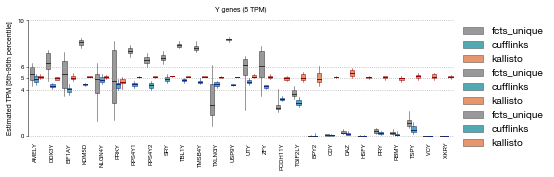

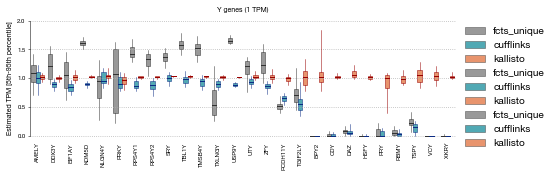

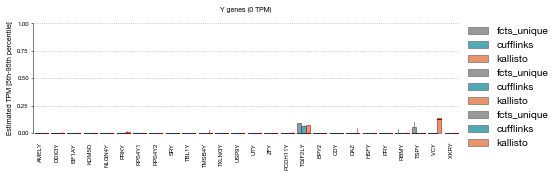

In [6]:
figs = {}
axes = {}
for s in ['sim_y5_x10', 'sim_y1_x2', 'sim_y0']:
    figs[s], axes[s] = ys.plot_sim_results(data, s, boxplot=True)
    figs[s].savefig("{0}/{1}.boxplot.pdf".format(outdir, s))

#### Summary of accuracy for estimating Y expression levels

In the table output below, the median estimated expression level and 95% empirical confidence intervals for each MSY gene are shown. 50 separate simulations were performed, all with the MSY gene simulated at 5 TPM, and its corresponding X homolog simulated at 10 TPM. 

The column `unbiased` indicates whether the 95% confidence interval overlaps 5 TPM. `perc_dev(95%)` gives the 95th-percentile absolute deviation from the input value of 5 TPM. In other words, `perc_dev(95%) = 7.1%` indicates that the estimated expression level fell in the range 5 TPM ±7.1% in 95% of simulations.

In [7]:
print("Summary for simulations with Y homologs at 5 TPM, X homologs at 10 TPM:")
res = ys.summarize_results(data['sim_y5_x10'], methods=['kallisto'])
res

Summary for simulations with Y homologs at 5 TPM, X homologs at 10 TPM:


input  kallisto                                           
          all    median      2.5%     97.5% unbiased perc_dev(95%)
AMELY    5.00  5.108801  4.837739  5.389430     True      0.071379
DDX3Y    5.00  4.989227  4.784592  5.131486     True      0.039528
EIF1AY   5.00  5.030351  4.648869  5.500837     True      0.089883
KDM5D    5.00  5.123940  5.088848  5.193365    False      0.038283
NLGN4Y   5.00  5.078335  4.740519  5.290974     True      0.058980
PRKY     5.00  4.697447  3.928500  5.103163     True      0.200895
RPS4Y1   5.00  5.108502  5.037730  5.150913    False      0.029706
RPS4Y2   5.00  5.118690  4.975666  5.157956     True      0.031316
SRY      5.00  5.160975  5.083861  5.178803    False      0.035169
TBL1Y    5.00  5.120052  5.042977  5.179821    False      0.033398
TMSB4Y   5.00  5.137649  5.065124  5.159256    False      0.031613
TXLNGY   5.00  5.073444  4.956357  5.186393     True      0.034898
USP9Y    5.00  5.096586  5.070968  5.115132    False      0.022755
UTY      5.00  5.120819  4.907094  5.420812     True      0.071063
ZFY      5.00  5.109915  4.846270  5.384048     True      0.066432
PCDH11Y  5.00  4.971327  4.766313  5.188065     True      0.044013
TGIF2LY  5.00  4.989169  4.620910  5.637887     True      0.111869
BPY2     5.00  4.899084  3.901200  6.103954     True      0.229166
CDY      5.00  5.093837  4.981385  5.273387     True      0.043006
DAZ      4.99  5.448120  4.970509  6.283112     True      0.215298
HSFY     5.00  5.068772  4.917584  5.180539     True      0.033757
PRY      5.00  5.129417  4.163356  5.241175     True      0.053447
RBMY     4.99  4.971194  4.587996  5.262130     True      0.073901
TSPY     4.99  5.175349  4.704157  5.481825     True      0.094658
VCY      5.00  5.138508  4.741965  5.542955     True      0.092182
XKRY     5.00  5.086181  4.848045  5.339225     True      0.053542

Save summaries

In [8]:
# estimates of Y expression levels
res = ys.summarize_results(data['sim_y5_x10'], methods=['kallisto', 'fcts_unique', 'cufflinks'])
res.to_csv('{}/msygenes.sim_y5_x10.summary.txt'.format(outdir), sep='\t')

res = ys.summarize_results(data['sim_y1_x2'], methods=['kallisto', 'fcts_unique', 'cufflinks'])
res.to_csv('{}/msygenes.sim_y1_x2.summary.txt'.format(outdir), sep='\t')

In [9]:
# estimates of Y/X ratios
res = ys.summarize_results(data['sim_y5_x10'], methods=['kallisto', 'fcts_unique', 'cufflinks'],
                           yxratios=True)
res.to_csv('{}/yxratios.sim_y5_x10.summary.txt'.format(outdir), sep='\t')

res = ys.summarize_results(data['sim_y1_x2'], methods=['kallisto', 'fcts_unique', 'cufflinks'],
                           yxratios=True)
res.to_csv('{}/yxratios.sim_y1_x2.summary.txt'.format(outdir), sep='\t')

### Estimates of Y/X expression ratios

#### Plots for Y/X ratios

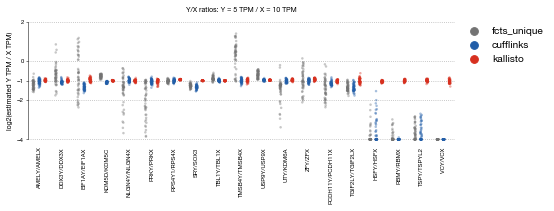

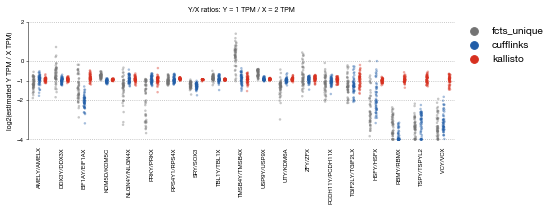

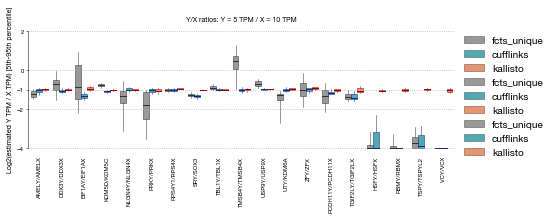

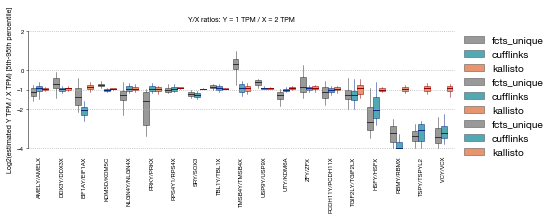

In [10]:
figs = {}
axes = {}
for s in ['sim_y5_x10', 'sim_y1_x2']:
    figs[s], axes[s] = ys.plot_sim_results(data, s, boxplot=False, log2yxratios=True)
    figs[s].savefig("{0}/{1}.yx_ratio.stripplot.pdf".format(outdir, s))
    
figs = {}
axes = {}
for s in ['sim_y5_x10', 'sim_y1_x2']:
    figs[s], axes[s] = ys.plot_sim_results(data, s, boxplot=True, log2yxratios=True)
    figs[s].savefig("{0}/{1}.yx_ratio.boxplot.pdf".format(outdir, s))

#### X and Y homolog expression levels are estimated independently

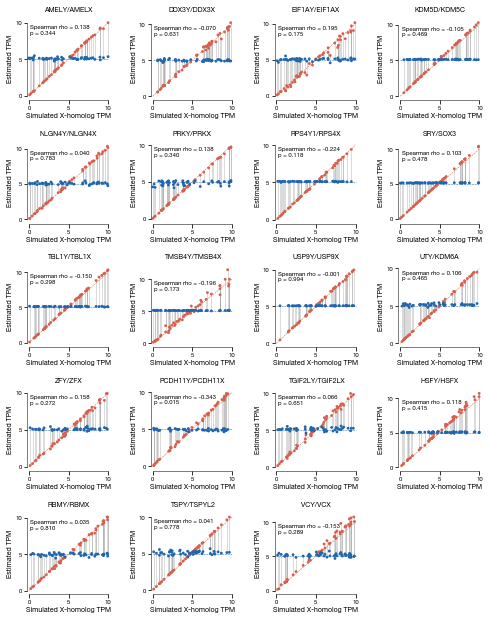

In [11]:
fig, axes = ys.plot_xy_uncorr_grid(data)
fig.savefig("{}/xy_uncorr_grid.pdf".format(outdir))